### Import Libraries 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
data = pd.read_csv(r"D:\Python\Project\video game sales\artifacts\vgsales_preprocessed.csv")

### Preprocessing

In [5]:
data

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,2002.0,4,269,0.01,0.00,0.00,0.00,0.01
16594,2003.0,8,241,0.01,0.00,0.00,0.00,0.01
16595,2008.0,6,21,0.00,0.00,0.00,0.00,0.01
16596,2010.0,5,8,0.00,0.01,0.00,0.00,0.01


In [9]:
# Split features and target variable
X = data[['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = data['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Training and evaluation

In [10]:
# Initialize different regression models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}


In [17]:
# Train and evaluate each model
best_model = None
best_score = float('inf')
evaluation_metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    if model_name == 'LinearRegression':
        # Retrieve coefficients for Linear Regression model
        coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
        print(f'Coefficients for {model_name} model:')
        print(coefficients)
    elif model_name in ['RandomForest', 'DecisionTree']:
        # Retrieve feature importances for RandomForest and DecisionTree models
        importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        print(f'Feature importances for {model_name} model:')
        print(importances)
        print("------------------------------------")
    
     
    # Make predictions for train set
    y_train_pred = model.predict(X_train_scaled)
    
    # Evaluate the model on train set
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Make predictions for test set
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate the model on test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store evaluation metrics in dictionary
    evaluation_metrics[model_name] = {'Train MAE': train_mae,
                                      'Train MSE': train_mse,
                                      'Train R-squared': train_r2,
                                      'Test MAE': test_mae,
                                      'Test MSE': test_mse,
                                      'Test R-squared': test_r2}
    
    # Save the best model
    if test_mae < best_score:
        best_score = test_mae
        best_model = model

# Save the best performing model
joblib.dump(best_model, r'D:\Python\Project\video game sales\artifacts\models\best_sales_prediction_model.pkl')

Feature importances for RandomForest model:
       Feature  Importance
0        Genre    0.001250
1    Publisher    0.000616
2     NA_Sales    0.849197
3     EU_Sales    0.104641
4     JP_Sales    0.031523
5  Other_Sales    0.012772
------------------------------------
Coefficients for LinearRegression model:
       Feature  Coefficient
0        Genre    -0.000019
1    Publisher    -0.000130
2     NA_Sales     0.751407
3     EU_Sales     0.443247
4     JP_Sales     0.308726
5  Other_Sales     0.173288
Feature importances for DecisionTree model:
       Feature  Importance
0        Genre    0.000222
1    Publisher    0.000206
2     NA_Sales    0.836802
3     EU_Sales    0.125250
4     JP_Sales    0.032250
5  Other_Sales    0.005269
------------------------------------


['D:\\Python\\Project\\video game sales\\artifacts\\models\\best_sales_prediction_model.pkl']

In [21]:
evaluation_df

,Train MAE,Train MSE,Train R-squared,Test MAE,Test MSE,Test R-squared
RandomForest,0.009723,0.006983,0.996458,0.041230,0.732838,0.825572
LinearRegression,0.002963,0.000027,0.999986,0.002964,0.000027,0.999993
DecisionTree,0.000248,0.000001,0.999999,0.060034,0.661403,0.842574


Based on these metrics, the Linear Regression model performs the best. Here's why:

- **Test MAE and Test MSE:** Linear Regression has the lowest Test MAE and Test MSE among all models, indicating that it makes the smallest errors when predicting sales on unseen data.

- **Test R-squared:** Linear Regression has the highest Test R-squared value, indicating that it explains the variability in the test data better than the other models.

- **Simplicity:** Linear Regression is a simpler model compared to RandomForest and DecisionTree. It provides a clear linear relationship between the features and the target variable, which might be suitable for this dataset.

Overall, based on the provided metrics, the Linear Regression model is the best choice for predicting sales in this scenario.


In [23]:

coefficients = pd.DataFrame({
    'Feature': ['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    'Coefficient': [-0.000019, -0.000130, 0.751407, 0.443247, 0.308726, 0.173288]
})


In [27]:
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
2,NA_Sales,0.751407
3,EU_Sales,0.443247
4,JP_Sales,0.308726
5,Other_Sales,0.173288
0,Genre,-0.000019
1,Publisher,-0.000130


**NA_Sales (North America Sales):**   
With a coefficient of 0.751407, NA_Sales has the highest positive impact on global sales. This suggests that for every unit increase in North America sales, the global sales increase by approximately 0.75 units.

**EU_Sales (Europe Sales):**
EU_Sales also has a significant positive impact on global sales, with a coefficient of 0.443247. This indicates that an increase in Europe sales leads to a proportional increase in global sales, though slightly less than that of NA_Sales.

**JP_Sales (Japan Sales):**  
 JP_Sales has a positive impact on global sales, albeit smaller compared to NA_Sales and EU_Sales. Its coefficient of 0.308726 suggests that an increase in Japan sales results in a smaller increase in global sales.

**Other_Sales:**  
 Other_Sales, representing sales from regions other than North America, Europe, and Japan, also contributes positively to global sales. Its coefficient of 0.173288 indicates that it has the least impact among the regional sales channels.

**Genre:**  
 The coefficient for Genre is very small (-0.000019), suggesting a negligible impact on global sales. This indicates that the genre of the product doesn't significantly influence its overall sales.

**Publisher:**   
Similarly, the coefficient for Publisher is also very small (-0.000130), indicating a minimal impact on global sales. This suggests that the publisher of the product has little influence on its overall sales performance.


### Conclusion

**In conclusion,**  
based on the coefficients obtained from the Linear Regression model, the most significant drivers of global sales in this Marketing Mix Model are the regional sales channels, particularly North America (NA_Sales) and Europe (EU_Sales)  

while the genre of the product and the publisher have minimal influence but as per the plot during analysis results are considerd wrt location vs genre to boost the sales at different locations

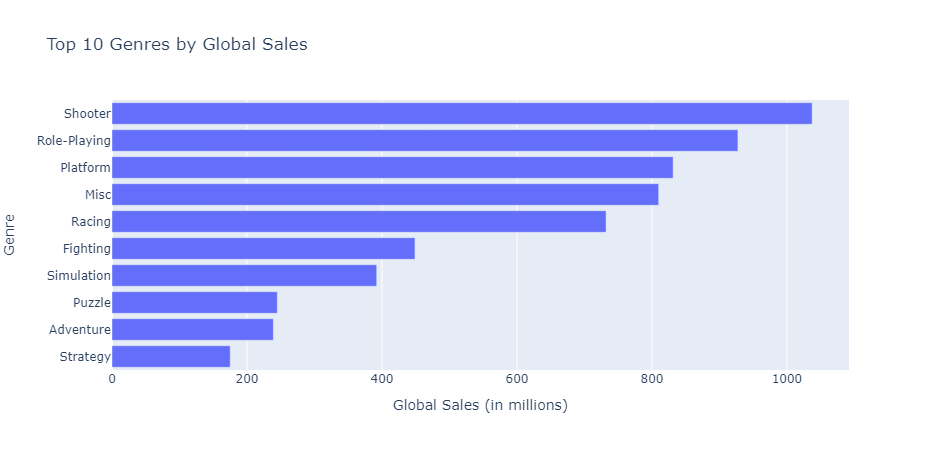

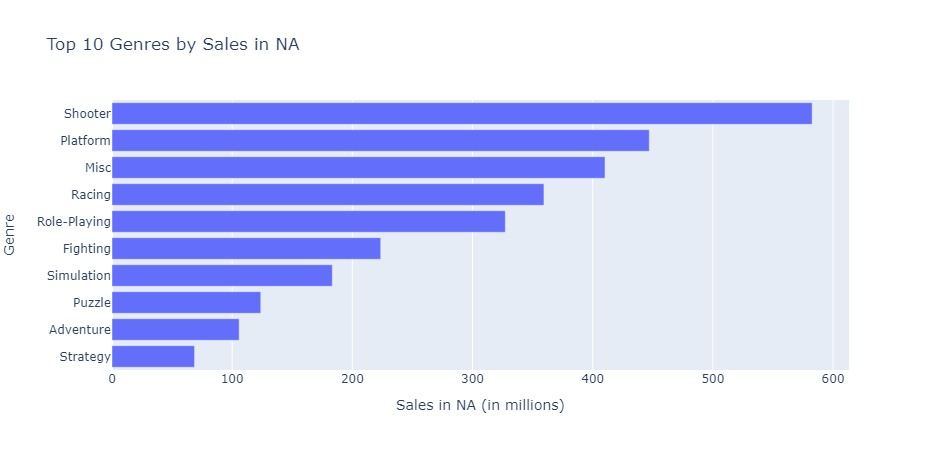

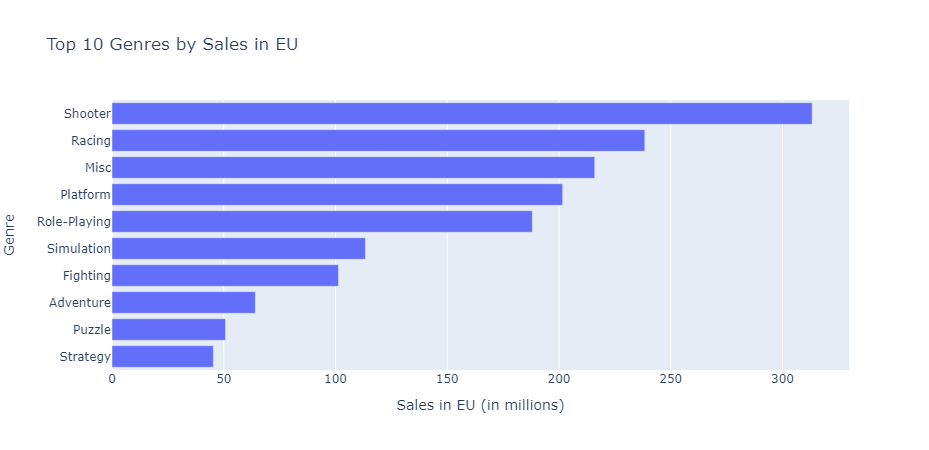

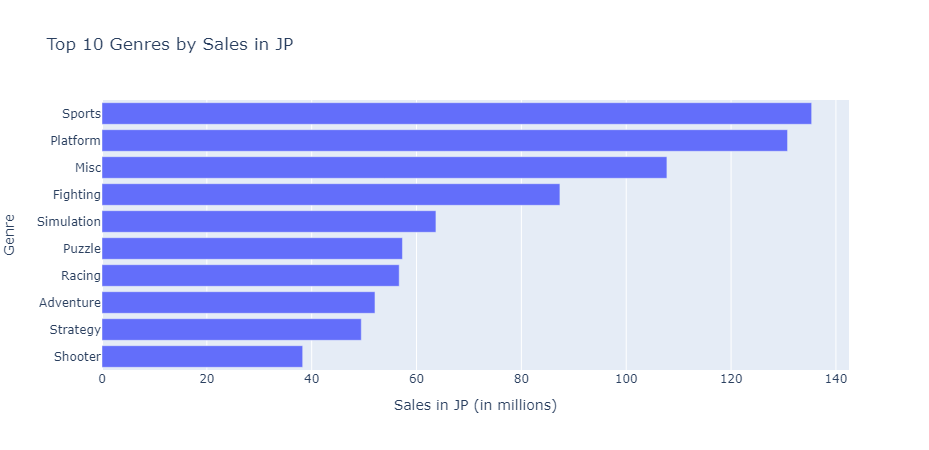

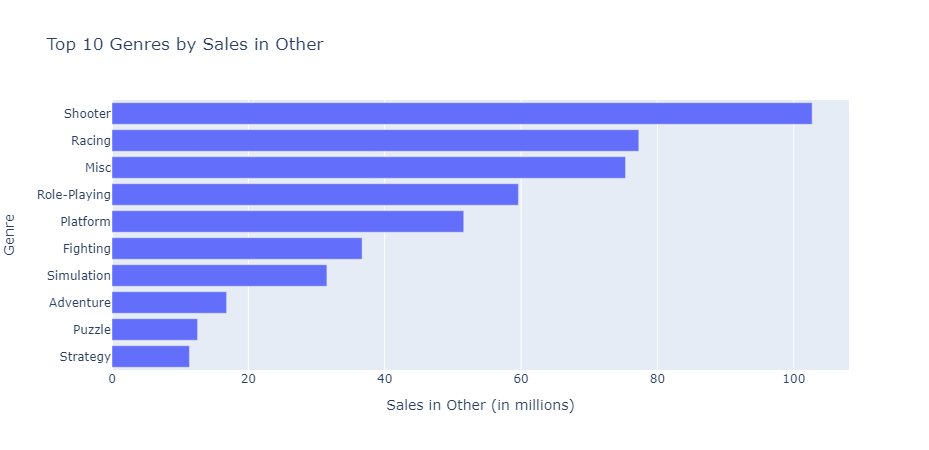